In [20]:
# overall activation of V
# t - matrix of fixed  weights from C window to V
# C - window that S unit sees  
def v_activation(C_layer,C,t):
    v = 0
    for i in range(len(C_layer)):
        v += v0_activation(C[i],t)
    return v**(1/2)

# Необходимые функции

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# excitatory input from C units
# С и W - поле видимости нейрона
def e_ex(C,W):
    return np.sum(np.multiply(C,W))

In [4]:
# signal sent by the inhibitory unit V from one window
# Для одного нейрона V и для одной матрицы ( 5х5 или 3х3)
# t - matrix of fixed  weights from C window to V
# C - window that S unit sees  
def v0_activation(C,t):
    return np.sum(np.multiply(t,np.multiply(C,C)))

In [5]:
# scaled input of S unit
def x_scaled(e,v,w0):
    return ((1+e)/(1+v*w0))-1

In [6]:
# output signal from S unit
def S(x):
    if x >= 0:
        return x
    else:
        return 0

In [7]:
# от одного окна
# S - матрица слоя S
# U - постоянные веса
def c0_in(S,U):
    return np.sum(np.multiply(S,U))

In [8]:
# output signal from C unit
def c(c_in,a):
    if c_in > 0.0:
        return float(c_in/(a+c_in))
    else:
        return 0

In [9]:
# Weights from S to C

def filter_weight(n):
    U = np.array([[0.0] * n] * n)
    middle = int(n/2)
    for i in range(n):
        for j in range(n):
            U[i,j] = 1/(1+np.fabs(i - middle)+np.fabs(j - middle))
    return U

In [10]:
# M - матрица, которую разбиваем
# возвращает список nxn матриц матриц 3x3
def filter3x3(M):
    n = len(M)
    F = np.array([[[[0.0]*3]*3]*n]*n)
    L = np.array([[0.0] * (n+2)] * (n+2))
    L[1:n+1,1:n+1] = M
    for i in range(n):
        for j in range(n):
            F[i,j] = L[i:i+3,j:j+3]
    return F

In [11]:
# n - размер исходной
# M - матрица, которую разбиваем
# возвращает список nxn матриц матриц 5x5
# для любых преобразований размерностей
# s - если шаг = 2 - через один
def filter5x5(n,M,s):
    F = np.array([[[[0.0]*5]*5]*n]*n)
    if s == 1:
        for i in range(n):
            for j in range(n):
                F[i,j] = M[i:i+5,j:j+5]
        return F
    z = int(n/2)*2+2-int(len(M)/2)
    L = np.array([[0.0] * (len(M)+z*2)] * (len(M)+z*2))
    L[z:len(M)+z,z:len(M)+z] = M
    for i in range(n):
        for j in range(n):
            F[i,j] = L[i*2:i*2+5,j*2:j*2+5]
    return F

In [12]:
n_layers = 8
n_arrays = np.array([1,12,8,38,22,32,30,16,10])
array_size = np.array([19,19,11,11,7,7,7,3,1])

In [13]:
# определим слои нейронной сети
C0 = np.array([[0.0]*19]*19) 
S1 = np.array([[[0.0]*19]*19]*12)
C1 = np.array([[[0.0]*11]*11]*8)
S2 = np.array([[[0.0]*11]*11]*38)
C2 = np.array([[[0.0]*7]*7]*22)
S3 = np.array([[[0.0]*7]*7]*32)
C3 = np.array([[[0.0]*7]*7]*30)
S4 = np.array([[[0.0]*3]*3]*16)
C4 = np.array([0.0]*10)

In [14]:
# схема перехода от S к С
CON_S1_C1 = np.array([1,2,1,2,1,2,1,2])
CON_S2_C2 = np.array([3,3,1,3,3,1,2,2,2,2,1,2,3,1,1,3,2,1,1,1,2,2])
shift_s2_c2 = np.array([1,3,1,1,3,1,2,2,2,2,1,2,3,1,1,3,2,1,1,1,2,2])
CON_S3_C3 = np.array([1 for i in range(30)])
CON_S3_C3[22] = 2
CON_S3_C3[28] = 2
CON_S4_C4 = np.array([2,2,1,2,2,1,2,1,1,2])

In [15]:
# определим матрицы весов для нашей нейронной сети

W_S1 = np.array([[[0.0]*3]*3]*12) #для каждого из 12 паттернов своя матрица веса 3 на 3, в начале нули
W0_S1 = np.array([0.0]*12) # для каждого из 12 один тормозящий вес
T_S1 = filter_weight(3) # fixed

U5_C1 = filter_weight(5) # fixed

W_S2 = np.array([[[[0.0]*3]*3]*8]*38) #для каждого из 38 приходится 8 матриц  3 на 3
W0_S2 = np.array([0.0]*38) # для каждого из 38 тормозящий вес  
T_S2 = filter_weight(3) # fixed

U5_C2 = filter_weight(5) # fixed

W_S3 = np.array([[[[0.0]*3]*3]*22]*32) #для каждого из 32 приходится 22 матрицы 3 на 3
W0_S3 = np.array([0.0]*32) # для каждого из 32 один тормозящий вес
T_S3 = filter_weight(3) # fixed

U3_C3 = filter_weight(3) # fixed

W_S4 = np.array([[[[0.0]*5]*5]*30]*16) #для каждого из 16 30 матриц 5 на 5
W0_S4 = np.array([0.0]*16) # для каждого из 16 один тормозящий вес
T_S4 = filter_weight(5) # fixed

U3_C4 = filter_weight(3) # fixed

# Ход сети

In [16]:
# заполним S1
def fill_S1():
    F = filter3x3(C0)
    for k in range(n_arrays[1]):
        for i in range(array_size[1]):
            for j in range(array_size[1]):
                S1[k,i,j] = S(x_scaled(e_ex(F[i,j],W_S1[k,:,:]),v0_activation(F[i,j],T_S1)**(1/2),W0_S1[k]))

In [17]:
# C1
def fill_C1():
    F2 = np.array([filter5x5(array_size[2],S1[i],2) for i in range(n_arrays[1])]) #разбили каждый array по фильтру
    q = 0
    for k in range(n_arrays[2]):
        for i in range(array_size[2]):
            for j in range(array_size[2]):
                c_in = 0
                for l in range(CON_S1_C1[k]):
                    c_in += c0_in(F2[q+l,i,j],U5_C1)
                C1[k,i,j] = c(c_in,0.25)
        q += CON_S1_C1[k]

In [18]:
#S2
def fill_S2():
    F2 = np.array([filter3x3(C1[i]) for i in range(n_arrays[2])]) #разбили каждый array по фильтру
    for k in range(n_arrays[3]):
        for i in range(array_size[3]):
            for j in range(array_size[3]):
                v = 0.0
                e = 0.0
                for l in range(n_arrays[2]):
                    v += v0_activation(F2[l,i,j],T_S2)
                    e += e_ex(F2[l,i,j],W_S2[k,l])
                S2[k,i,j] = S(x_scaled(e,v**(1/2),W0_S2[k]))

In [19]:
# C2
def fill_C2():
    F2 = np.array([filter5x5(array_size[4],S2[i],2) for i in range(n_arrays[3])]) #разбили каждый array по фильтру
    q = 0
    for k in range(n_arrays[4]):
        for i in range(array_size[4]):
            for j in range(array_size[4]):
                c_in = 0.0
                for l in range(CON_S2_C2[k]):
                    c_in += c0_in(F2[q+l,i,j],U5_C2)
                C2[k,i,j] = c(c_in,0.25)
        q += shift_s2_c2[k] # так как есть повторяющиеся, нужно учитывать, что некоторые исп несколько раз

In [20]:
#S3
def fill_S3():
    F2 = np.array([filter3x3(C2[i]) for i in range(n_arrays[4])]) #разбили каждый array по фильтру
    for k in range(n_arrays[5]):
        for i in range(array_size[5]):
            for j in range(array_size[5]):
                v = 0.0
                e = 0.0
                for l in range(n_arrays[4]):
                    v += v0_activation(F2[l,i,j],T_S3)
                    e += e_ex(F2[l,i,j],W_S3[k,l])
                S3[k,i,j] = S(x_scaled(e,v**(1/2),W0_S3[k]))

In [21]:
# C3
def fill_C3():
    F2 = np.array([filter3x3(S3[i]) for i in range(n_arrays[5])]) #разбили каждый array по фильтру
    q = 0
    for k in range(n_arrays[6]):
        for i in range(array_size[6]):
            for j in range(array_size[6]):
                c_in = 0
                for l in range(CON_S3_C3[k]):
                    c_in += c0_in(F2[q+l,i,j],U3_C3)
                C3[k,i,j] = c(c_in,0.25)
        q += CON_S3_C3[k]

In [22]:
#S4
def fill_S4():
    F2 = np.array([filter5x5(array_size[7],C3[i],2) for i in range(n_arrays[6])]) #разбили каждый array по фильтру
    for k in range(n_arrays[7]):
        for i in range(array_size[7]):
            for j in range(array_size[7]):
                v = 0
                e = 0
                for l in range(n_arrays[6]):
                    v += v0_activation(F2[l,i,j],T_S4)
                    e += e_ex(F2[l,i,j],W_S4[k,l])
                S4[k,i,j] = S(x_scaled(e,v**(1/2),W0_S4[k]))

In [23]:
# C4
def fill_C4():
    q = 0
    for k in range(n_arrays[8]):
        c_in = 0
        for l in range(CON_S4_C4[k]):
            c_in += c0_in(S4[q+l],U3_C4)
        C4[k] = c(c_in,1)
        q += CON_S4_C4[k]

# Training patterns

# Patterns for S1 level

In [24]:
plt.gray()

In [25]:
# patterns for S1 level
S1_p = np.array([[[0]*3]*3]*12)
S1_p[0,1,:] = 1

S1_p[1,1,:2] = 1
S1_p[1,0,2] = 1

S1_p[2,1,1:] = 1
S1_p[2,2,0] = 1

S1_p[3,2,0] = 1
S1_p[3,1,1] = 1
S1_p[3,0,2] = 1

S1_p[4,2,0] = 1
S1_p[4,:2,1] = 1

S1_p[5,0,2] = 1
S1_p[5,1:,1] = 1

S1_p[6,:,1] = 1

S1_p[7,0,0] = 1
S1_p[7,1:,1] = 1

S1_p[8,2,2] = 1
S1_p[8,:2,1] = 1

S1_p[9,0,0] = 1
S1_p[9,1,1] = 1
S1_p[9,2,2] = 1

S1_p[10,1,:2] = 1
S1_p[10,2,2] = 1

S1_p[11,1,1:] = 1
S1_p[11,0,0] = 1

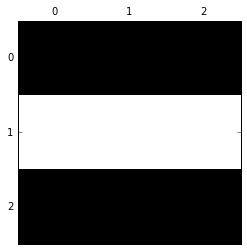

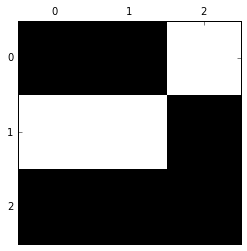

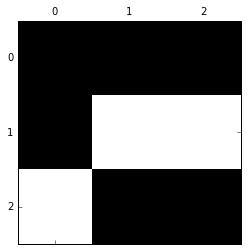

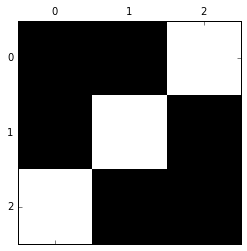

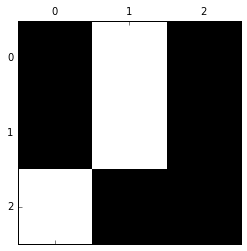

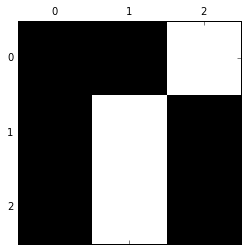

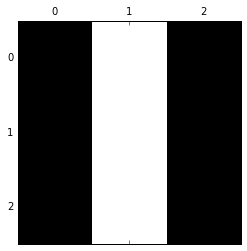

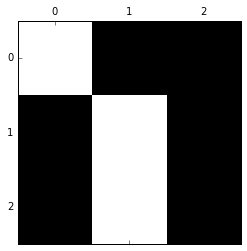

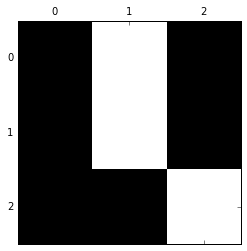

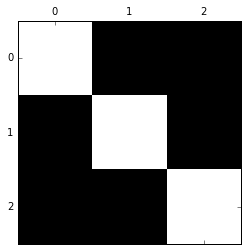

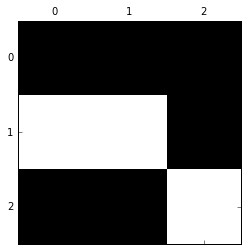

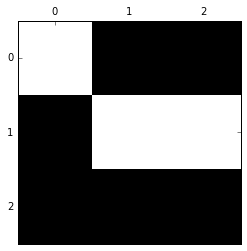

In [26]:
for i in S1_p:
    plt.matshow(i) 
    plt.show()

In [27]:
from PIL import Image

# # Patterns for S2 level

In [28]:
S_2_train = np.array([[[0.0]*11]*11]*38)
for i in  range(38):
    image = Image.open("D:\Digits\S_2_{}.png".format(i+1))
    image = np.array(image)[:,:,0]
    image[np.where(image == [0])] = [1]
    image[np.where(image == [255])] = [0]
    S_2_train[i,:,:]= image

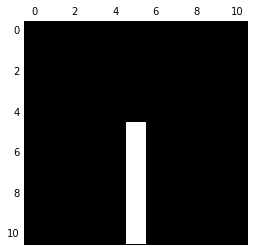

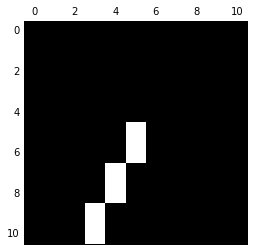

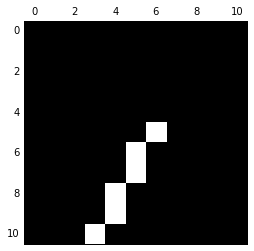

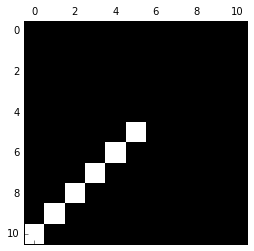

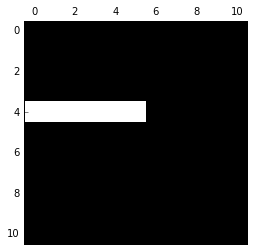

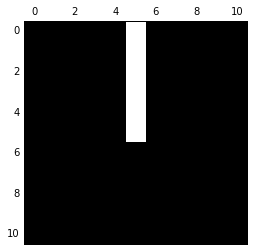

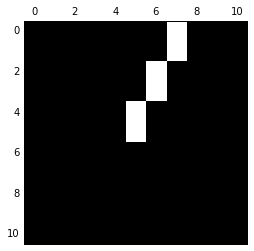

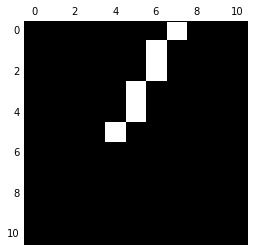

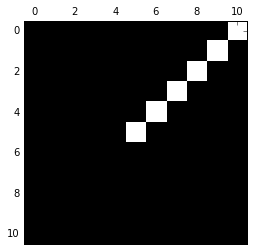

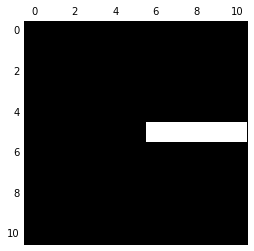

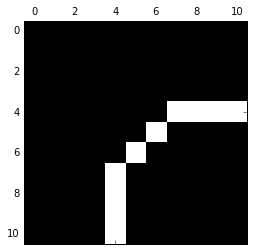

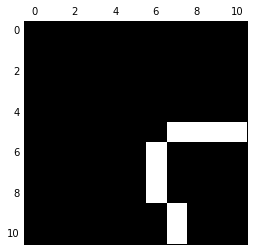

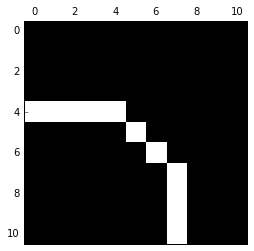

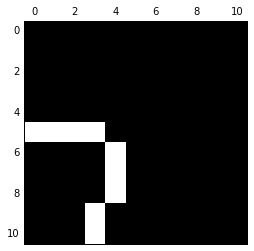

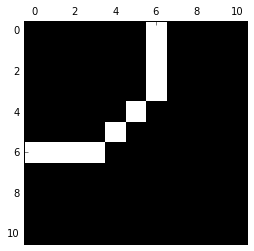

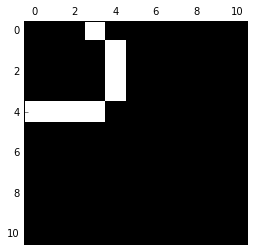

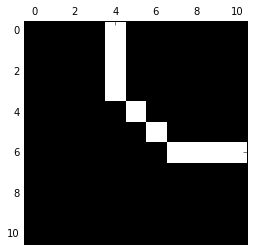

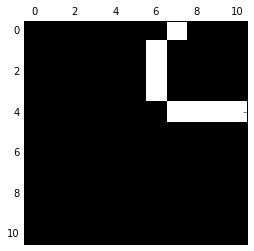

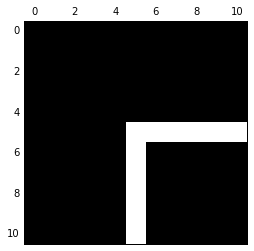

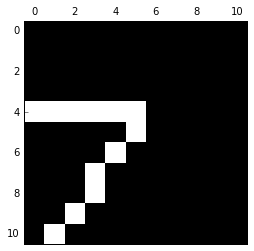

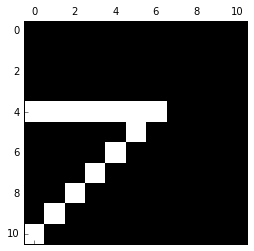

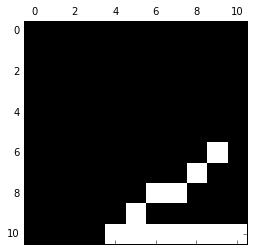

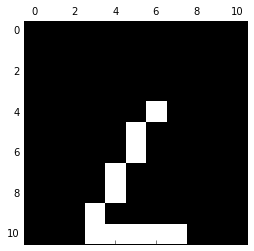

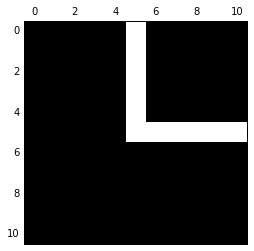

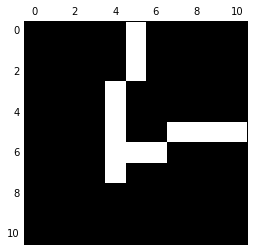

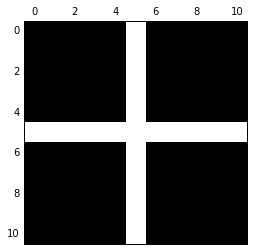

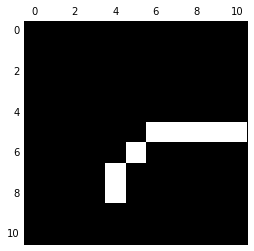

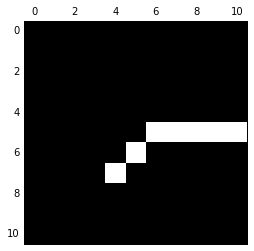

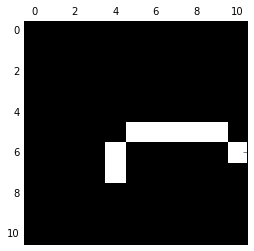

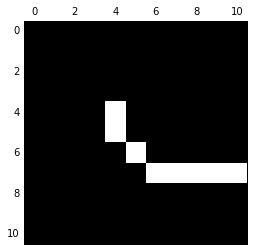

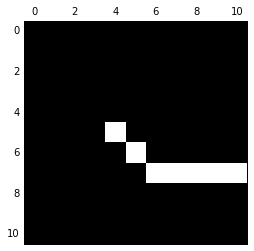

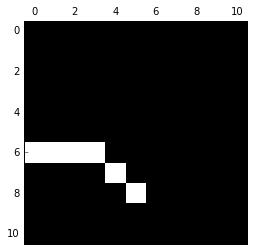

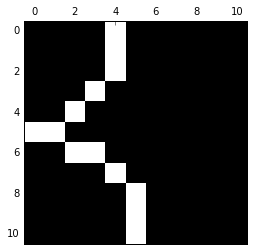

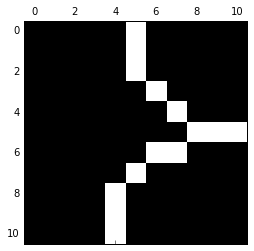

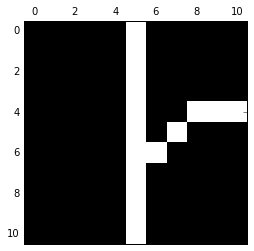

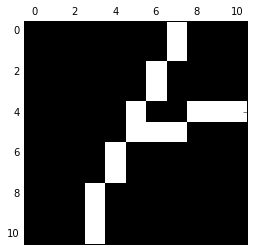

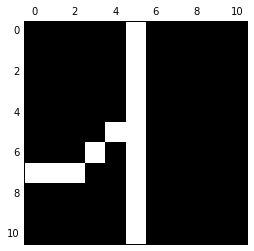

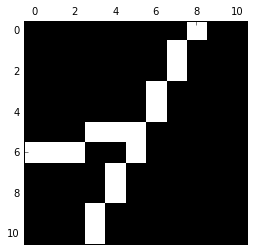

In [29]:
for i in S_2_train:
    plt.matshow(i) 
    plt.show()

# Patterns for S3 level


In [30]:
S_3_train = np.array([[[0.0]*19]*19]*32)
for i in  range(32):
    image = Image.open("D:\Digits\S_3_{}.png".format(i+1))
    image = np.array(image)[:,:,0]
    image[np.where(image == [0])] = [1]
    image[np.where(image == [255])] = [0]
    S_3_train[i,:,:]= image

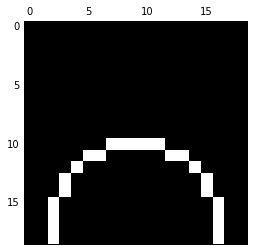

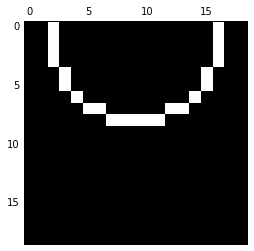

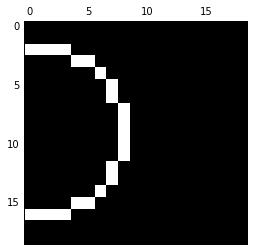

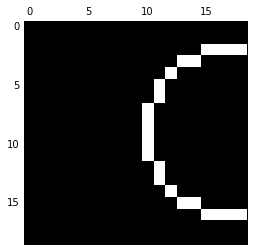

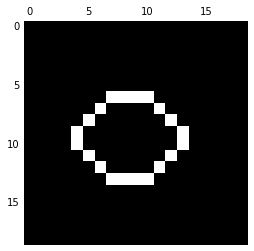

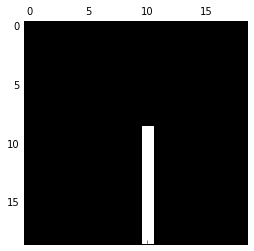

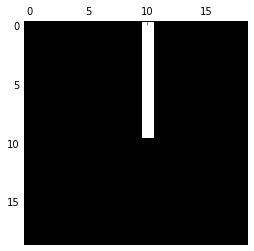

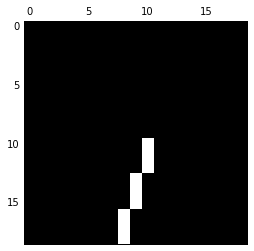

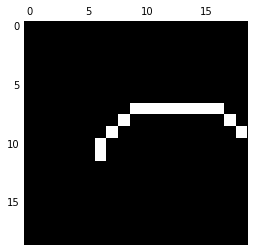

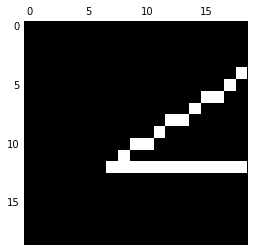

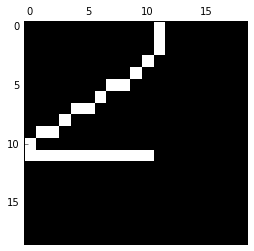

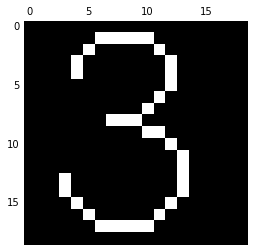

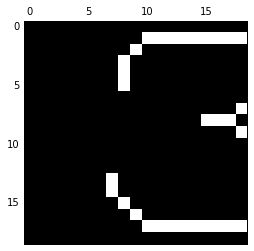

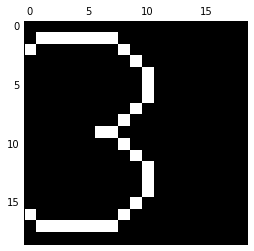

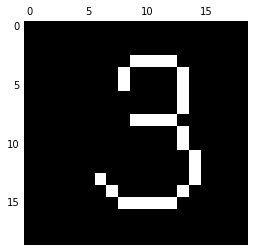

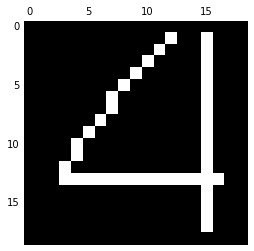

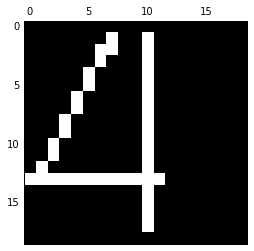

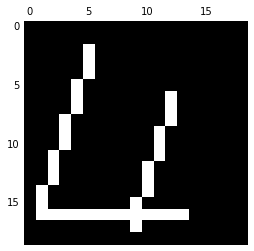

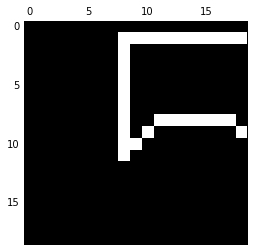

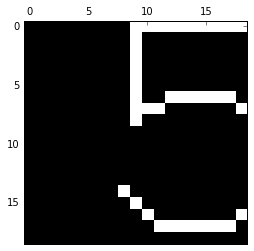

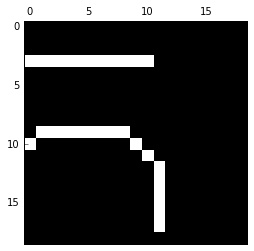

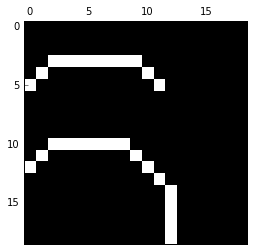

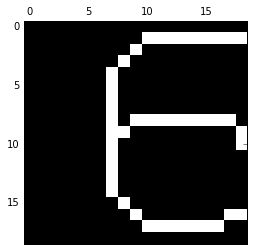

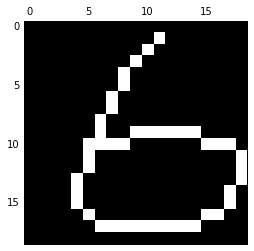

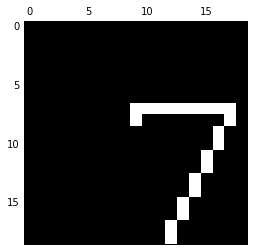

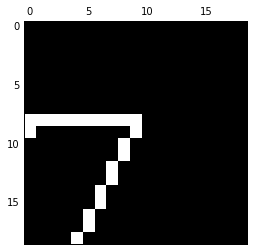

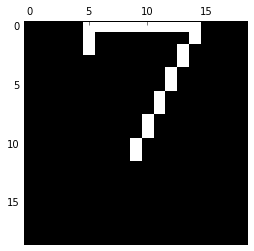

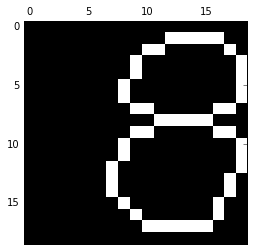

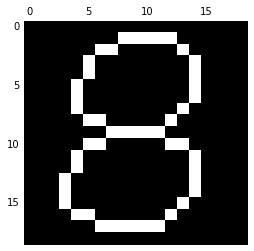

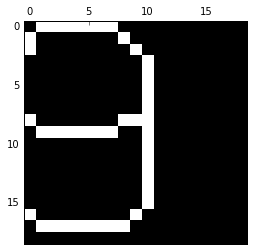

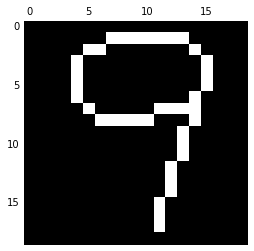

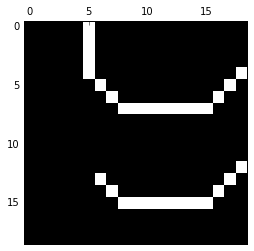

In [31]:
for i in S_3_train:
    plt.matshow(i) 
    plt.show()

# Patterns for S3 level

In [32]:
S_4_train = np.array([[[0.0]*19]*19]*16)
for i in  range(16):
    image = Image.open("D:\Digits\S_4_{}.png".format(i+1))
    image = np.array(image)[:,:,0]
    image[np.where(image == [0])] = [1]
    image[np.where(image == [255])] = [0]
    S_4_train[i,:,:]= image

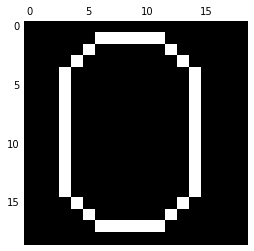

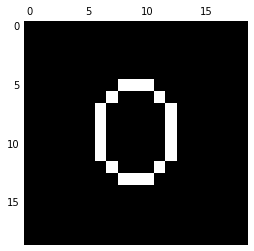

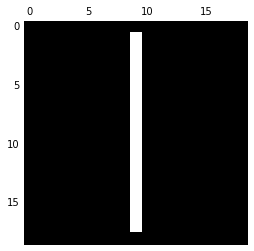

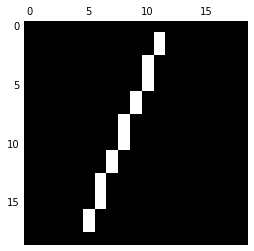

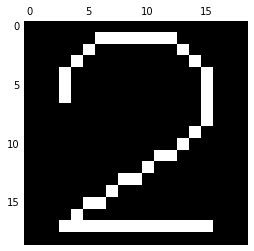

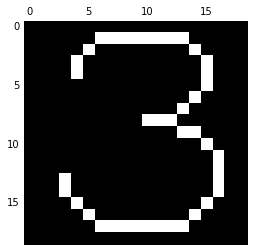

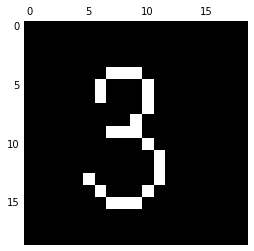

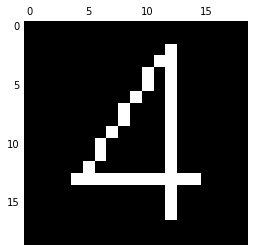

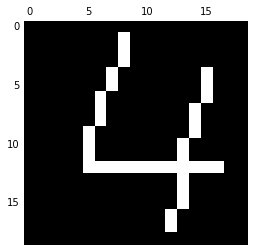

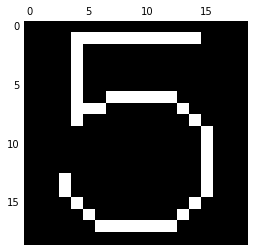

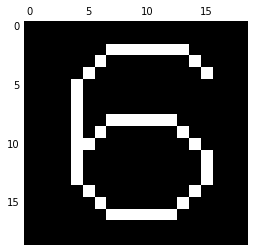

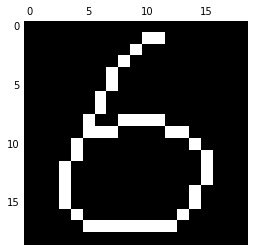

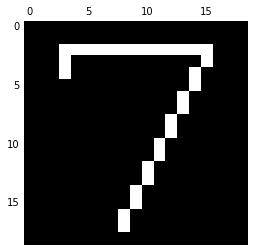

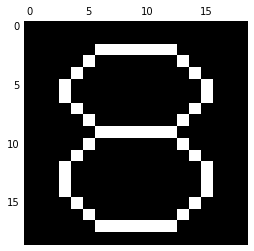

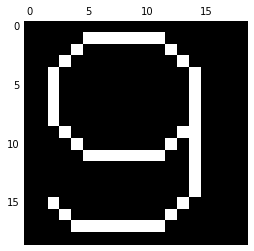

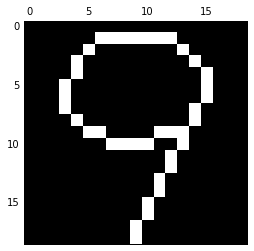

In [33]:
for i in S_4_train:
    plt.matshow(i) 
    plt.show()

# Training process

In [34]:
# C0 -> S1
# alpha - learning rate
alpha = 0.5
for i in range(W_S1.shape[0]):
    W_S1[i] += alpha * np.multiply(T_S1,S1_p[i])
    W0_S1[i] += alpha * S1_p[i,1,1]

In [35]:
# C1 -> S2
for i in range(W_S2.shape[0]): # для каждого array  в слое S2 = для каждого training pattern
    C0[4:15,4:15] = S_2_train[i]
    fill_S1()
    fill_C1()
    for j in range(W_S2.shape[1]): # для каждого array  в слое C1
        W_S2[i,j] += alpha * np.multiply(T_S2,C1[j,5:8,5:8])
        W0_S2[i] += alpha * C1[j,6,6]    

In [36]:
# C2 -> S3
for i in range(W_S3.shape[0]): # для каждого array  в слое S3 = для каждого training pattern
    C0 = S_3_train[i]
    fill_S1()
    fill_C1()
    fill_S2()
    fill_C2()
    for j in range(W_S3.shape[1]): # для каждого array  в слое C2
        W_S3[i,j] += alpha * np.multiply(T_S3,C2[j,3:6,3:6])
        W0_S3[i] += alpha * C2[j,4,4]    

In [37]:
# C3 -> S4
for i in range(W_S4.shape[0]): # для каждого array  в слое S4 = для каждого training pattern
    C0 = S_4_train[i]
    fill_S1()
    fill_C1()
    fill_S2()
    fill_C2()
    fill_S3()
    fill_C3()
    for j in range(W_S4.shape[1]): # для каждого array  в слое C3
        W_S4[i,j] += alpha * np.multiply(T_S4,C3[j,2:7,2:7])
        W0_S4[i] += alpha * C3[j,4,4]  

In [38]:
C0 = S_4_train[5]
fill_S1()
fill_C1()
fill_S2()
fill_C2()
fill_S3()
fill_C3()
fill_S4()
fill_C4()
C4

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [39]:
C2

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.01933779,  0.03181944, ...,  0.13722714,
          0.25693834,  0.17518774],
        [ 0.        ,  0.03265656,  0.09122569, ...,  0.20067939,
          0.42058475,  0.257322  ],
        ..., 
        [ 0.        ,  0.02939544,  0.08328965, ...,  0.13165786,
          0.36306398,  0.23939291],
        [ 0.        ,  0.01784711,  0.02939544, ...,  0.09116666,
          0.2081049 ,  0.1548438 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.01965085,  0.03868637, ...,  0.12464175,
          0.23817717,  0.16369285],
        [ 0.        ,  0.03316415,  0.0996044 , ...,  0.22975237,
          0.43682084,  0.25922861],
        ..., 
        [ 0.        ,  0.02939544,  0.08328965, ...,

In [40]:
S3

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 